In [1]:
#Importing and defining functions
import swiglpk
from swiglpk import *
import matplotlib.pyplot as plt

def myfunction(t,y,v):
    return -v * y

def rungekutta(t,y,h,v):
    k1 = h * myfunction(t,y,v)
    k2 = h * myfunction(t + h * 0.5, y + k1 * 0.5,v)
    k3 = h * myfunction(t + h/2, y + k2 * 0.5,v) 
    k4 = h * myfunction(t + h, y + k3,v)
    y = y + (1.0 / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    t = t + h
    return t,y

In [2]:
#Initial conditions
t = 0
tp = [t]
tmax = 2
y = 1
yp = [y]
h = 0.005
v = 2
#Set up the stoichiometric matrix
ia = intArray(1+1000); ja = intArray(1+1000);
ar = doubleArray(1+1000);
lp = glp_create_prob();
glp_set_prob_name(lp, "sample");
glp_set_obj_dir(lp, GLP_MAX); #Set the objective direction
glp_add_rows(lp, 3);
glp_set_row_name(lp, 1, "p");
glp_set_row_bnds(lp, 1, GLP_UP, 0.0, 100.0);
glp_set_row_name(lp, 2, "q");
glp_set_row_bnds(lp, 2, GLP_UP, 0.0, 600.0);
glp_set_row_name(lp, 3, "r");
glp_set_row_bnds(lp, 3, GLP_UP, 0.0, 300.0);
glp_add_cols(lp, 3);
glp_set_col_name(lp, 1, "x1");
glp_set_col_bnds(lp, 1, GLP_LO, 0.0, 0.0);
glp_set_obj_coef(lp, 1, 10.0);
glp_set_col_name(lp, 2, "x2");
glp_set_col_bnds(lp, 2, GLP_LO, 0.0, 0.0);
glp_set_obj_coef(lp, 2, 7.0);
glp_set_col_name(lp, 3, "x3");
glp_set_col_bnds(lp, 3, GLP_LO, 0.0, 0.0);
glp_set_obj_coef(lp, 3, 0.0);
ia[1] = 1; ja[1] = 1; ar[1] = 1.0; # a[1,1] = 1
ia[2] = 1; ja[2] = 2; ar[2] = 1.0; # a[1,2] = 1
ia[3] = 1; ja[3] = 3; ar[3] = 1.0; # a[1,3] = 1
ia[4] = 2; ja[4] = 1; ar[4] = 10.0; # a[2,1] = 10
ia[5] = 3; ja[5] = 1; ar[5] = 2.0; # a[3,1] = 2
ia[6] = 2; ja[6] = 2; ar[6] = 4.0; # a[2,2] = 4
ia[7] = 3; ja[7] = 2; ar[7] = 2.0; # a[3,2] = 2
ia[8] = 2; ja[8] = 3; ar[8] = 5.0; # a[2,3] = 5
ia[9] = 3; ja[9] = 3; ar[9] = 6.0; # a[3,3] = 6
glp_load_matrix(lp, 9, ia, ja, ar);
glp_simplex(lp, None);
Z = glp_get_obj_val(lp);
Zmax = Z
x1 = glp_get_col_prim(lp, 1);
x2 = glp_get_col_prim(lp, 2);
x3 = glp_get_col_prim(lp, 3);
print("\nZ = %g; x1 = %g; x2 = %g; x3 = %g\n" % (Z, x1, x2, x3))

bl = [0,0,0,0,0,0]
zp = [Z]
x1p = [x1]
x2p = [x2]
x3p = [x3]

#Integrating and resolving the LP
while t < tmax:
    v = Z/Zmax
    t,y = rungekutta(t,y,h,v)
    #THIS IS WHERE WE SET OUR UPDATES TO OUR PROBLEM
    glp_set_row_bnds(lp, 2, GLP_UP, 0.0, 600.0*y);
    glp_set_obj_coef(lp,2,7.0*y);
    glp_set_obj_coef(lp,3,15.0*(1-y));
    #-----------------------------------------------
    glp_load_matrix(lp, 9, ia, ja, ar);
    glp_simplex(lp, None);
    Z = glp_get_obj_val(lp);
    x1 = glp_get_col_prim(lp, 1);
    x2 = glp_get_col_prim(lp, 2);
    x3 = glp_get_col_prim(lp, 3);
    zp = zp + [Z]
    x1p = x1p + [x1]
    x2p = x2p + [x2]
    x3p = x3p + [x3]
    tp = tp + [t]
    yp = yp + [y]


Z = 800; x1 = 33.3333; x2 = 66.6667; x3 = 0
GLPK Simplex Optimizer 5.0
3 rows, 3 columns, 9 non-zeros
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   8.000000000e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND

GLPK Simplex Optimizer 5.0
3 rows, 3 columns, 9 non-zeros
*     2: obj =   7.961588213e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
GLPK Simplex Optimizer 5.0
3 rows, 3 columns, 9 non-zeros
*     2: obj =   7.923207886e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
GLPK Simplex Optimizer 5.0
3 rows, 3 columns, 9 non-zeros
*     2: obj =   7.884865193e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
GLPK Simplex Optimizer 5.0
3 rows, 3 columns, 9 non-zeros
*     2: obj =   7.846566092e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
GLPK Simplex Optimizer 5.0
3 rows, 3 columns, 9 non-zeros
*     2: obj =   7.808316334e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
GLPK Simplex Optimizer 5.0
3 rows, 3 columns, 9 non-zeros
*     2

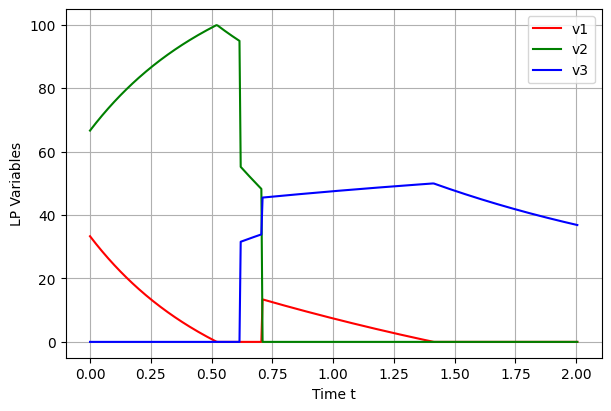

In [3]:
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
linesx1 = ax.plot(tp,x1p,"r",label="v1")
linesx2 = ax.plot(tp,x2p,"g",label="v2")
linesx3 = ax.plot(tp,x3p,"b",label="v3")
plt.legend()
ax.set_xlabel("Time t")
ax.set_ylabel("LP Variables")
plt.grid()

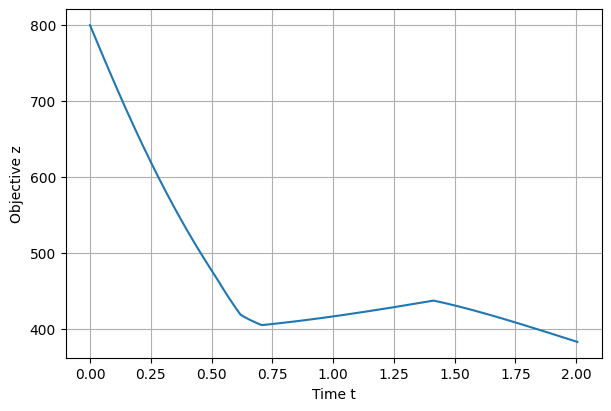

In [4]:
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
linesz = ax.plot(tp,zp,label="Z")
ax.set_xlabel("Time t")
ax.set_ylabel("Objective z")
plt.grid()

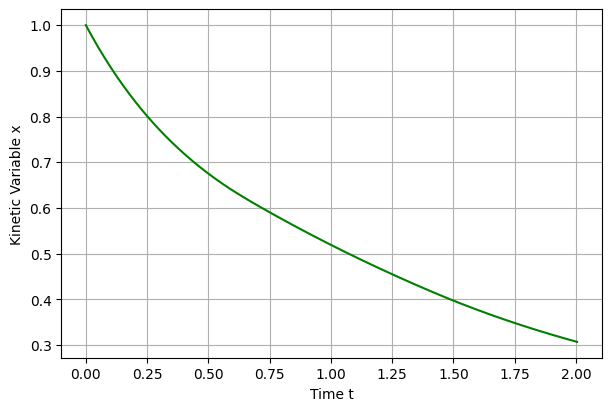

In [5]:
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
linesz = ax.plot(tp,yp,"g",label="v")
ax.set_xlabel("Time t")
ax.set_ylabel("Kinetic Variable x")
plt.grid()